# Binary Classification


# Assignment


**Background:** Imagine that you are an admissions officer for a highly
sought-after graduate program. As part of a new initiative to streamline
the admissions process, a function -- whose precise specifications are
known only to the administration -- has been developed to evaluate each
application with respect to some criteria. A composite metric known as
'fit' is computed for each individual candidate; those scoring *greater
than or equal to 70* are extended an admissions offer.

**Objective:** In the absence of a clear-cut function with which to
assign 'fit' scores, learn a classification rule by assembling and
training classification models on historical admissions data. Thus the
target here is to predict the "chance of admit > .7" from the other columns.

------------------------------------------------------------------------

Note: For reproducible results, include `random_state=42` as a parameter
to Sklearn functions.

1.  -   Examine the structure and format of the data. 
            - Is it suitable for logistic regression? 
            - How do the features relate to one another?
            - If necessary, encode the target variable based 
              on the threshold of 70% in other words chance of admit .7

    -   Apply PCA to the input dimensions (excluding the target) and 
        select the first two principal components that *account for 80% 
        of the variance. 
        - Scatter plot the data in the first two PCA dimensions. Color the dots
          so we can see chance of admit.
        - We should only performing dimensionality reduction merely for the sake of
          visualization -- in this instance. Below we will note the adverse effect it would
          have on the model's overall performance if we used only the first two PCA components
          in the classification.

    -   Split the data into a training and testing set. The testing set
        should be one fifth the size of the training set.


1. You will run and evaluate the following classification models on the data

    **(1)** *logistic regression*
    
    **(2)** *linear support vector classification*
    
    **(3)** *k-nearest neighbors classification*
    
    **(4)** *decision tree classification*

    -   Train and test your classifiers using the previously reduced
        data. For each model, plot the classification probability.

    -   Manually tune your models' hyperparameters so that each achieves
        a *Cohen's kappa statistic* greater than 0.65. Note that this function
        can be fount in
        
            sklearn.metrics.cohen_kappa_score
        
        here you will compare the test 'y' ground truth labels to the model
        predictions.

        -   For logistic regression and support vector classification,
            adjust the inverse regularization parameter `C` and observe
            how the probability threshold reacts. Considering the ratio
            between accepted and rejected applicants, adjust the
            `class_weight` parameter accordingly. Use a range of values plot
            the score. 

        -   For k-nearest neighbors classification, consider adjusting
            the `n_neighbors` parameter. Generally, the empirically
            optimal K is found using an optimization heuristic -- in
            this case, adjust the parameter manually and observe any
            changes.

    -   Compute the *accuracy* score for each classifier. Why might this
        be a misleading performance metric?

    -   Shuffle your data set. If at all, how does this affect your
        results? Try a different train, test split (different random seed). How much
        does this matter?
        
    -   Do decision trees differ between runs? Try three or for different runs with different randomizations and
        see how results differ. See both how accuracy differs and the trees differ. For
        interpretability, use the PyDotPlus package to visualize your decision trees.


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df = pd.read_csv('Admission_Predict(1).csv')
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [45]:

df.loc[df['Chance of Admit '] >= 0.7, 
         ['Chance of Admit ']] = 1
df.loc[df['Chance of Admit '] < 0.7, 
         ['Chance of Admit ']] = 0

# Separate into features and target
X = pd.DataFrame(df)
X = X.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']


In [47]:
X.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


There are 153 samples of class 0 and 247 samples of class 1
Therefore accuracy is not a correct metric, as there is some class imbalance.


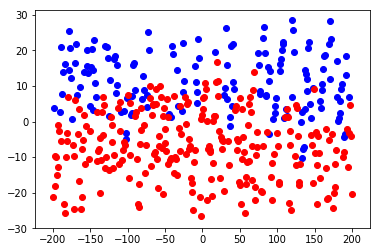

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca.fit(X)

pc = pca.transform(X)
# get indexes of features belonging to chance of admision <0.7 and >0.7
indx_0 = X.loc[y == 0].index.values
indx_1 = X.loc[y == 1].index.values

print('There are {} samples of class 0 and {} samples of class 1'.format(len(indx_0), len(indx_1)))
print('Therefore accuracy is not a correct metric, as there is some class imbalance.')

# plot to see if linearly separable
plt.scatter(pc[:,0][indx_0],pc[:,1][indx_0], color='blue')
plt.scatter(pc[:,0][indx_1],pc[:,1][indx_1], color='red')


In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

Logistic Regression accuracy: 0.9
Logistic Regression cohen kappa: 0.7942122186495177


/home/lukas/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


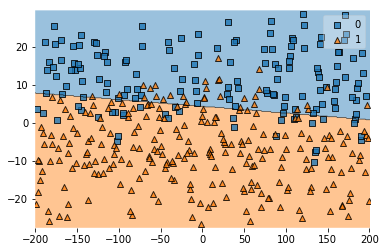

In [105]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, max_iter=50)
lr.fit(X_train, y_train)

from sklearn.metrics import cohen_kappa_score, accuracy_score
from mlxtend.plotting import plot_decision_regions
y_pred = lr.predict(X_test)
ck = cohen_kappa_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression accuracy: {}'.format(acc))
print('Logistic Regression cohen kappa: {}'.format(ck))
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
y_combined = y_combined.astype(np.integer)
plot_decision_regions(X_combined, y_combined, clf=lr)

SVM accuracy: 0.9
SVM cohen kappa: 0.7942122186495177


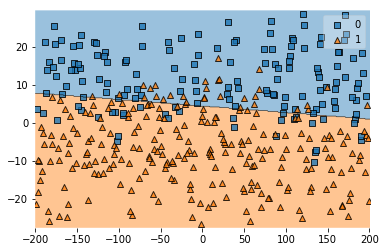

In [106]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=5)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
ck = cohen_kappa_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print('SVM accuracy: {}'.format(acc))
print('SVM cohen kappa: {}'.format(ck))
plot_decision_regions(X_combined, y_combined, clf=svc)
  

K-Neighbors accuracy: 0.8875
K-Neighbors cohen kappa: 0.7671410090556274


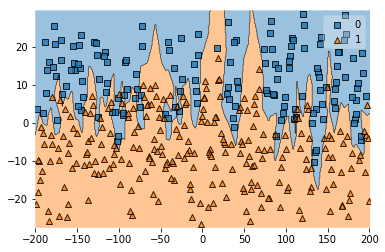

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
ck = cohen_kappa_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print('K-Neighbors accuracy: {}'.format(acc))
print('K-Neighbors cohen kappa: {}'.format(ck))
accuracy_score(y_test, y_pred)
plot_decision_regions(X_combined, y_combined, clf=knn)

Tree accuracy: 0.875
Tree cohen kappa: 0.7269624573378839


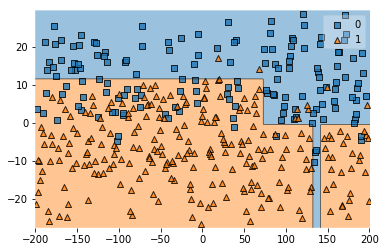

In [108]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
ck = cohen_kappa_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print('Tree accuracy: {}'.format(acc))
print('Tree cohen kappa: {}'.format(ck))
plot_decision_regions(X_combined, y_combined, clf=dt)

In [103]:
'''Using random seed = 42, I got (for a fixed set of hyperparameters per model):
    
Logistic Regression accuracy: 0.85
Logistic Regression cohen kappa: 0.6875

SVM accuracy: 0.8375
SVM cohen kappa: 0.6596858638743456    
    
K-Neighbors accuracy: 0.8875
K-Neighbors cohen kappa: 0.7643979057591623
    
Tree accuracy: 0.8625
Tree cohen kappa: 0.708994708994709   




Using a random seed = 1337, turning into different samples in the train and test partition; Using the same
hyperparameters per model, the results are: 

Logistic Regression accuracy: 0.9
Logistic Regression cohen kappa: 0.7942122186495177

SVM accuracy: 0.9
SVM cohen kappa: 0.7942122186495177

K-Neighbors accuracy: 0.8875
K-Neighbors cohen kappa: 0.7671410090556274

Tree accuracy: 0.875
Tree cohen kappa: 0.7269624573378839



There was overall a big effect on the data randomization. This could be removed by using K-fold CrossValidation. 
Thereby having every sample being part of a training and a test set, then averaging performance over all 
non-overlapping test sets
'''

    

'Using random seed = 42, I got (for a fixed set of hyperparameters per model):\n    \nLogistic Regression accuracy: 0.85\nLogistic Regression cohen kappa: 0.6875\n\nSVM accuracy: 0.8375\nSVM cohen kappa: 0.6596858638743456    \n    \nK-Neighbors accuracy: 0.8875\nK-Neighbors cohen kappa: 0.7643979057591623\n    \nTree accuracy: 0.8625\nTree cohen kappa: 0.708994708994709    '